In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris=load_iris()
df_features = iris.feature_names

In [59]:
df_data = pd.DataFrame(iris.data, columns = df_features)
df_labels = pd.DataFrame(iris.target, columns = ['label'])

In [60]:
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
df_labels

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [62]:
data = pd.concat([df_data, df_labels], axis=1)

In [63]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

In [65]:
X=data.drop('label',axis=1)
X=X.drop('petal width (cm)',axis=1)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [66]:
y=data['petal width (cm)']
y.value_counts()

0.2    29
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal width (cm), dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:3].values
y = data.iloc[:,3].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [74]:
from keras import models
from keras import layers

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(26, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model() 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 26)                104       
                                                                 
 dense_15 (Dense)            (None, 20)                540       
                                                                 
 dense_16 (Dense)            (None, 16)                336       
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,541
Trainable params: 1,541
Non-traina

In [75]:
model.fit(X_train, y_train, epochs=80, batch_size=20, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 83ms/step - loss: 0.0434 - mae: 0.0841


In [76]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0434 - mae: 0.0864 - val_loss: 0.0434 - val_mae: 0.0857
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0434 - mae: 0.0867 - val_loss: 0.0434 - val_mae: 0.0847
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0434 - mae: 0.0871 - val_loss: 0.0434 - val_mae: 0.0802
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0434 - mae: 0.0859 - val_loss: 0.0434 - val_mae: 0.0843
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0434 - mae: 0.0865 - val_loss: 0.0434 - val_mae: 0.0850
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0434 - mae: 0.0868 - val_loss: 0.0434 - val_mae: 0.0834
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0434 - mae: 0.0866 - val_loss: 0.0434 - val_mae: 0.0837
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0434 - mae: 0.0864 - va

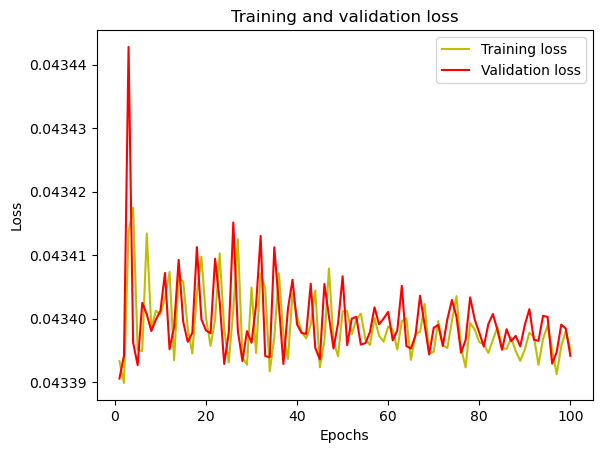

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()